In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.densenet import DenseNet169
from sklearn.metrics import confusion_matrix
import itertools

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [21]:
#Dataset of images is organized via test and trainin folders where each has subfolders with benign and malignant skin moles
# Flow training images in batches of 120 using flow_from_directory
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/skin-cancer-modified/data/train',  # source directory for training images
        classes = ['benign', 'malignant'],
        target_size=(200, 200),  # Resizing each image to 200x200
        color_mode='rgb',    
        batch_size=20,
        # Use binary labels
        class_mode='binary',)

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '//kaggle/input/skin-cancer-modified/data/test',  #source directory for training images
        classes = ['benign', 'malignant'],
        target_size=(200, 200),
        color_mode='rgb',
        batch_size=20,
        # Use binary labels
        class_mode='binary',
        shuffle=False)
test_generator = test_datagen.flow_from_directory(
        '//kaggle/input/skin-cancer-modified/data/test2',  #source directory for training images
        classes = ['benign', 'malignant'],
        target_size=(200, 200),
        color_mode='rgb',
        batch_size=20,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 2637 images belonging to 2 classes.
Found 598 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [51]:
model = keras.Sequential([
    # Block One
    layers.Input([200, 200, 3]),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    # Block Two
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='softmax')
])

In [53]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
)

In [57]:
model.evaluate(validation_generator)

660/660 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1880 - loss: 0.7542


[0.689010739326477, 0.5454545617103577]

In [40]:
model_updated=keras.Sequential([
    #Pretrained Model
    layers.Input([200, 200, 3]),
    DenseNet169(weights = 'imagenet', input_shape = (200,200,3),include_top = False),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    #Block 1
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    #Block 2
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1,activation='sigmoid'),
])

In [41]:
model_updated.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [42]:
history_updated = model_updated.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=8
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 0.5390 - loss: 0.8767 - val_accuracy: 0.4214 - val_loss: 0.8767
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 365ms/step - accuracy: 0.6685 - loss: 0.5993 - val_accuracy: 0.4448 - val_loss: 0.7461
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step - accuracy: 0.7346 - loss: 0.6668 - val_accuracy: 0.5803 - val_loss: 0.6698
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 363ms/step - accuracy: 0.8675 - loss: 0.4086 - val_accuracy: 0.6957 - val_loss: 0.6129
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 362ms/step - accuracy: 0.8097 - loss: 0.3834 - val_accuracy: 0.7140 - val_loss: 0.5584
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 351ms/step - accuracy: 0.8708 - loss: 0.3428 - val_accuracy: 0.7124 - val_loss: 0.5397
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - accuracy: 0.8229 - loss: 0.4331 - val_accuracy: 0.7074 - val_loss: 0.5351
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 363ms/step - accuracy: 0.8671 - loss: 0.3509 - val_accuracy: 0.6890 - val_loss: 0.5451
Epoc

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step - accuracy: 0.8938 - loss: 0.2551 - val_accuracy: 0.7876 - val_loss: 0.4278
Epoch 18/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 373ms/step - accuracy: 0.8297 - loss: 0.3473 - val_accuracy: 0.8077 - val_loss: 0.3991
Epoch 19/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 359ms/step - accuracy: 0.8486 - loss: 0.2609 - val_accuracy: 0.8227 - val_loss: 0.3832
Epoch 20/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step - accuracy: 0.8812 - loss: 0.2772 - val_accuracy: 0.8227 - val_loss: 0.3744


In [47]:
model_updated.evaluate(test_generator)
model_updated.evaluate(train_generator)
model_updated.evaluate(validation_generator)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9278 - loss: 0.2526 
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.8461 - loss: 0.3388
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8768 - loss: 0.3098


[0.3744437098503113, 0.8227424621582031]

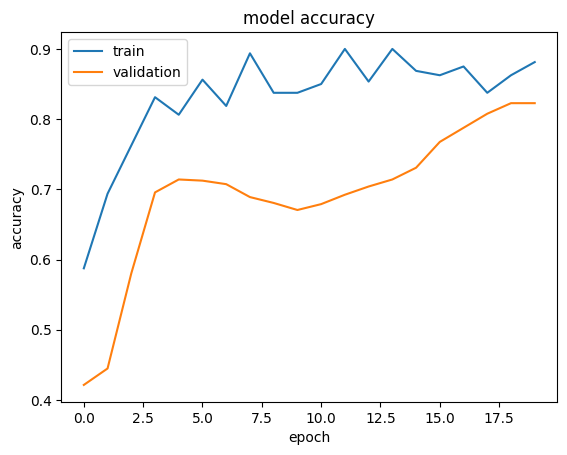

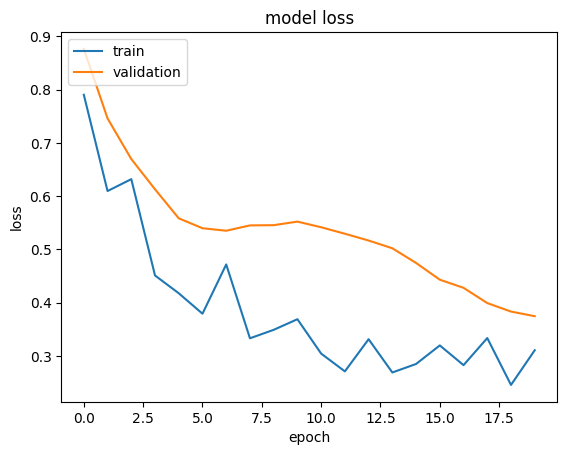

In [46]:
# summarize history for accuracy
plt.plot(history_updated.history['accuracy'])
plt.plot(history_updated.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_updated.history['loss'])
plt.plot(history_updated.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
# Confusion Matrix
def plot_confusion_matrix(model, test_gen):
    # Get Predictions
    preds = model.predict(test_gen)  
    y_pred = np.where(preds > 0.5, 1,0)
    g_dict = test_gen.class_indices
    classes = list(g_dict.keys())
    
    # Display the confusion matrix
    cm = confusion_matrix(test_gen.classes, y_pred)

    plt.figure(figsize= (10, 10))
    plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.show()

30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 455ms/step


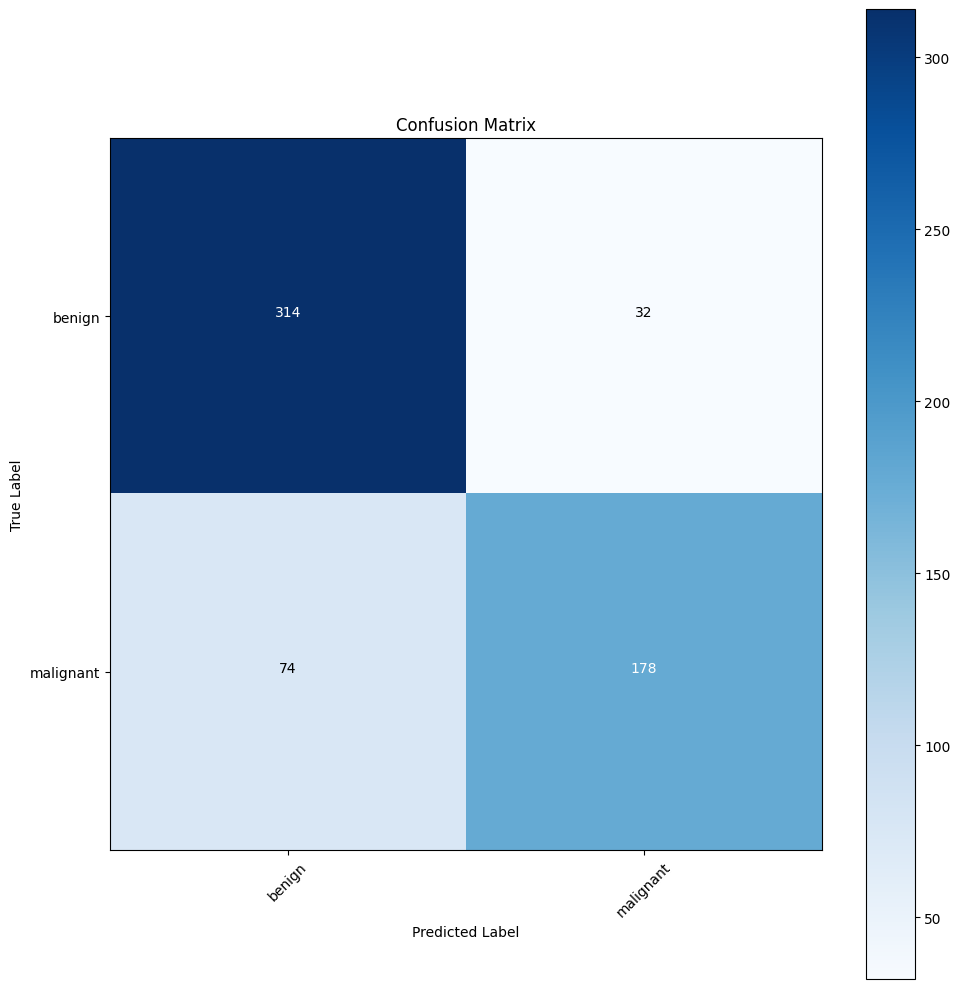

In [45]:
plot_confusion_matrix(model_updated,validation_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step 


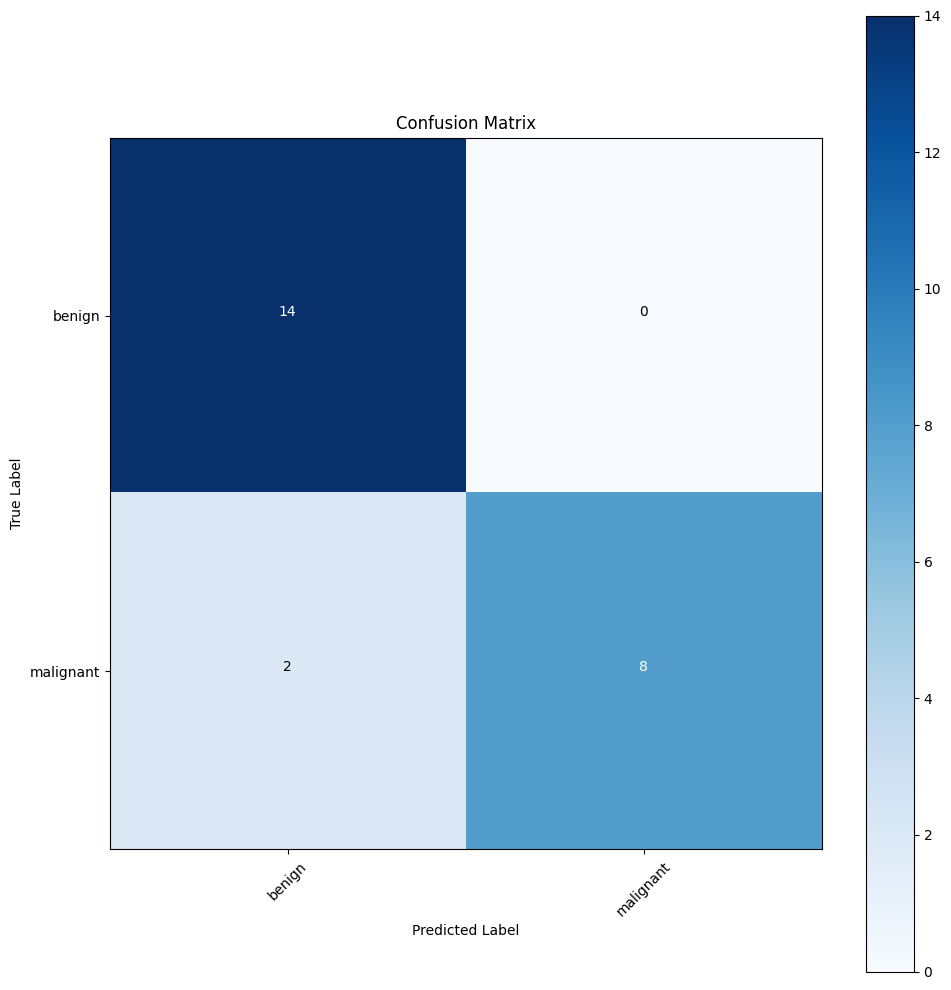

In [48]:
plot_confusion_matrix(model_updated,test_generator)